In [105]:
# Importar las librerias necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler

In [107]:
# 1. Cargar el dataset
data = pd.read_csv('D:\\UNAD_ANDRES\\Titanic-Dataset.csv')

In [109]:
# 2. Análisis exploratorio de datos (EDA)

print(data.head())  # Mostrar las primeras filas del dataset

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [111]:
print(data.describe())  # Resumen estadístico de las columnas numéricas

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [113]:
print(data.info())  # Información sobre tipos de datos y valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


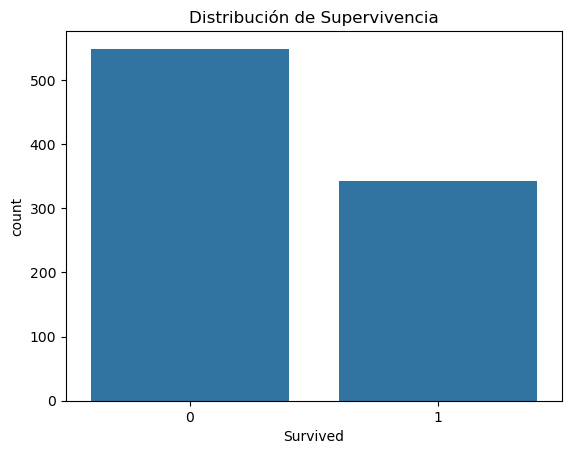

In [115]:
# Visualizar la distribución de la variable objetivo 'Survived'
sns.countplot(x='Survived', data=data)
plt.title('Distribución de Supervivencia')
plt.show()

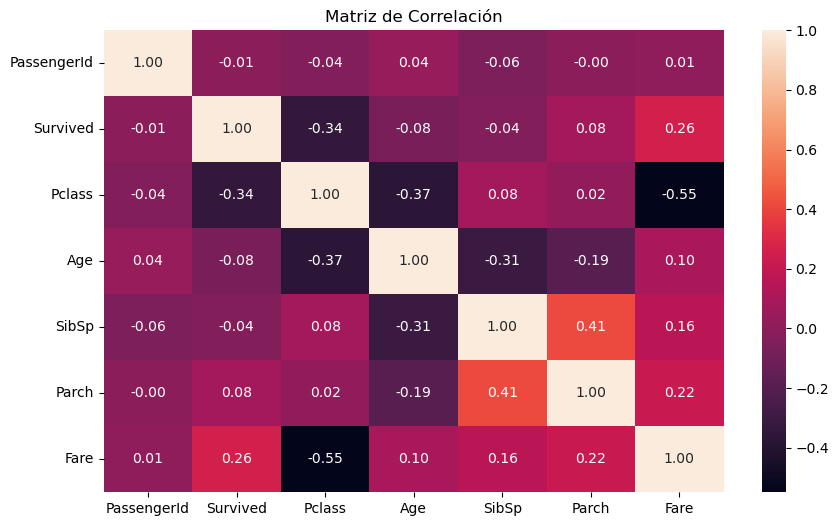

In [117]:
# Gráficos de correlación - primero seleccionamos solo las columnas numéricas
data_numeric = data.select_dtypes(include=['number'])
plt.figure(figsize=(10, 6))
sns.heatmap(data_numeric.corr(), annot=True, fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

In [119]:
# 3. Preprocesamiento de datos
# Tratamiento de valores faltantes

data['Age'] = data['Age'].fillna(data['Age'].median())  # Rellenar valores faltantes en 'Age' con la mediana
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])  # Rellenar 'Embarked' con la moda

In [121]:
# Convertir variables categóricas en variables dummy (one-hot encoding)
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

In [123]:
# Eliminar columnas innecesarias
data.drop(columns=['Name', 'Ticket', 'Cabin', 'PassengerId'], inplace=True)

In [125]:
# 4. Selección de características más relevantes
X = data.drop('Survived', axis=1)  # Características (features)
y = data['Survived']  # Variable objetivo

selector = SelectKBest(score_func=f_classif, k='all')  # Seleccionar todas las características para evaluar su importancia
selector.fit(X, y)

SelectKBest(k='all')

In [99]:
# Mostrar el puntaje de cada característica
scores = pd.DataFrame(selector.scores_, index=X.columns, columns=['Score'])
print(scores.sort_values(by='Score', ascending=False))

                 Score
Sex_male    372.405724
Pclass      115.031272
Fare         63.030764
Embarked_S   20.374460
Parch         5.963464
Age           3.761528
SibSp         1.110572
Embarked_Q    0.011846


In [129]:
# 5. División del dataset en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [131]:
# Escalar los datos utilizando StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Ajustar y transformar los datos de entrenamiento
X_test_scaled = scaler.transform(X_test)        # Transformar los datos de prueba

In [133]:
# 6. Entrenamiento del modelo de regresión logística con más iteraciones
model = LogisticRegression(max_iter=500)  # Inicializar el modelo con un número máximo de iteraciones aumentado
model.fit(X_train_scaled, y_train)  # Entrenar el modelo

LogisticRegression(max_iter=500)

In [135]:
# 7. Evaluación del desempeño del modelo en el conjunto de Test
y_pred = model.predict(X_test_scaled)  # Predicciones sobre el conjunto de prueba

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



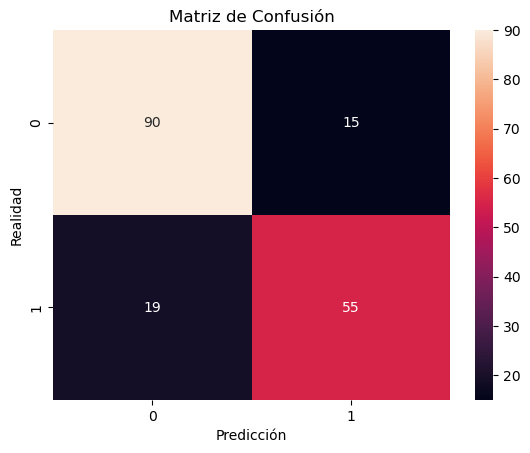

In [137]:
# Reporte de clasificación y matriz de confusión
print(classification_report(y_test, y_pred))  # Métricas como precisión, recall y F1-score

conf_matrix = confusion_matrix(y_test, y_pred)  # Matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

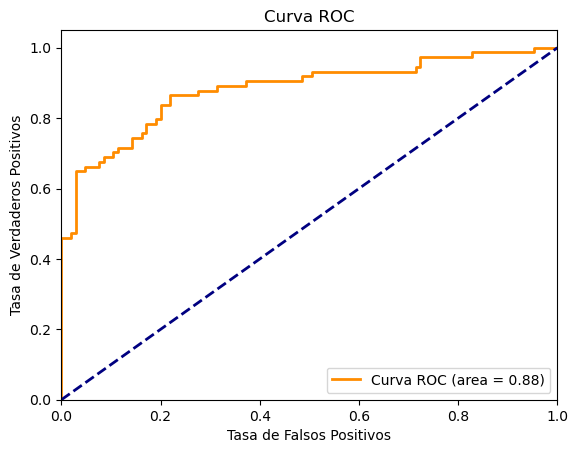

In [139]:
# Gráfico ROC-AUC para evaluar el rendimiento del modelo
y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probabilidades de la clase positiva
fpr, tpr, _ = roc_curve(y_test, y_prob)  # Calcular la curva ROC
roc_auc = auc(fpr, tpr)  # Calcular el área bajo la curva

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()